In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
sns.set_style('whitegrid')

In [38]:
datasetPath = "../datasets/"
consumoPath = "consumo.sas7bdat"
dietaPath = "caract_dieta.sas7bdat"
domicilioPath = "domicilio.sas7bdat"
dfDomicilio = pd.read_sas(datasetPath+domicilioPath)
dfConsumo = pd.read_sas(datasetPath+consumoPath)
dfDieta = pd.read_sas(datasetPath+dietaPath)

In [39]:
## Gerar coluna que identifica uma pessoa
def criarPessoa(row):
    return f'{row["COD_UPA"]}#{row["NUM_UC"]}#{row["NUM_DOM"]}#{row["COD_INFORMANTE"]}'

dfConsumo = dfConsumo[dfConsumo.QUADRO == 72]

dfConsumo['PESSOA'] = dfConsumo.apply(lambda row: criarPessoa(row), axis=1)

In [40]:
## Contar quantas pessoas existem
len(dfConsumo['PESSOA'].unique())

46164

In [75]:
UF_code = {
    # Norte
    11: {
        "name": "Rondônia",
        "region": "Norte",
    },
    12: {
        "name": "Acre",
        "region": "Norte",
    },
    13: {
        "name": "Amazonas",
        "region": "Norte",
    },
    14: {
        "name": "Roraima",
        "region": "Norte",
    },
    15: {
        "name": "Pará",
        "region": "Norte",
    },
    16: {
        "name": "Amapá",
        "region": "Norte",
    },
    17: {
        "name": "Tocantins",
        "region": "Norte",
    },
    # Nordeste
    21: {
        "name": "Maranhão",
        "region": "Nordeste",
    },
    22: {
        "name": "Piauí",
        "region": "Nordeste",
    },
    23: {
        "name": "Ceará",
        "region": "Nordeste",
    },
    24: {
        "name": "Rio Grande do Norte",
        "region": "Nordeste",
    },
    25: {
        "name": "Paraíba",
        "region": "Nordeste",
    },
    26: {
        "name": "Pernambuco",
        "region": "Nordeste",
    },
    27: {
        "name": "Alagoas",
        "region": "Nordeste",
    },
    28: {
        "name": "Sergipe",
        "region": "Nordeste",
    },
    29: {
        "name": "Bahia",
        "region": "Nordeste",
    },
    # Sudeste
    31: {
        "name": "Minas Gerais",
        "region": "Sudeste",
    },
    32: {
        "name": "Espírito Santo",
        "region": "Sudeste",
    },
    33: {
        "name": "Rio de Janeiro",
        "region": "Sudeste",
    },
    35: {
        "name": "São Paulo",
        "region": "Sudeste",
    },
    # Sul
    41: {
        "name": "Paraná",
        "region": "Sul",
    },
    42: {
        "name": "Santa Catarina",
        "region": "Sul",
    },
    43: {
        "name": "Rio Grande do Sul",
        "region": "Sul",
    },
    # Centro-Oeste
    50: {
        "name": "Mato Grosso do Sul",
        "region": "Centro-Oeste",
    },
    51: {
        "name": "Mato Grosso",
        "region": "Centro-Oeste",
    },
    52: {
        "name": "Goiás",
        "region": "Centro-Oeste",
    },
    53: {
        "name": "Distrito Federal",
        "region": "Centro-Oeste",
    },
}

## Observações por par de atributos

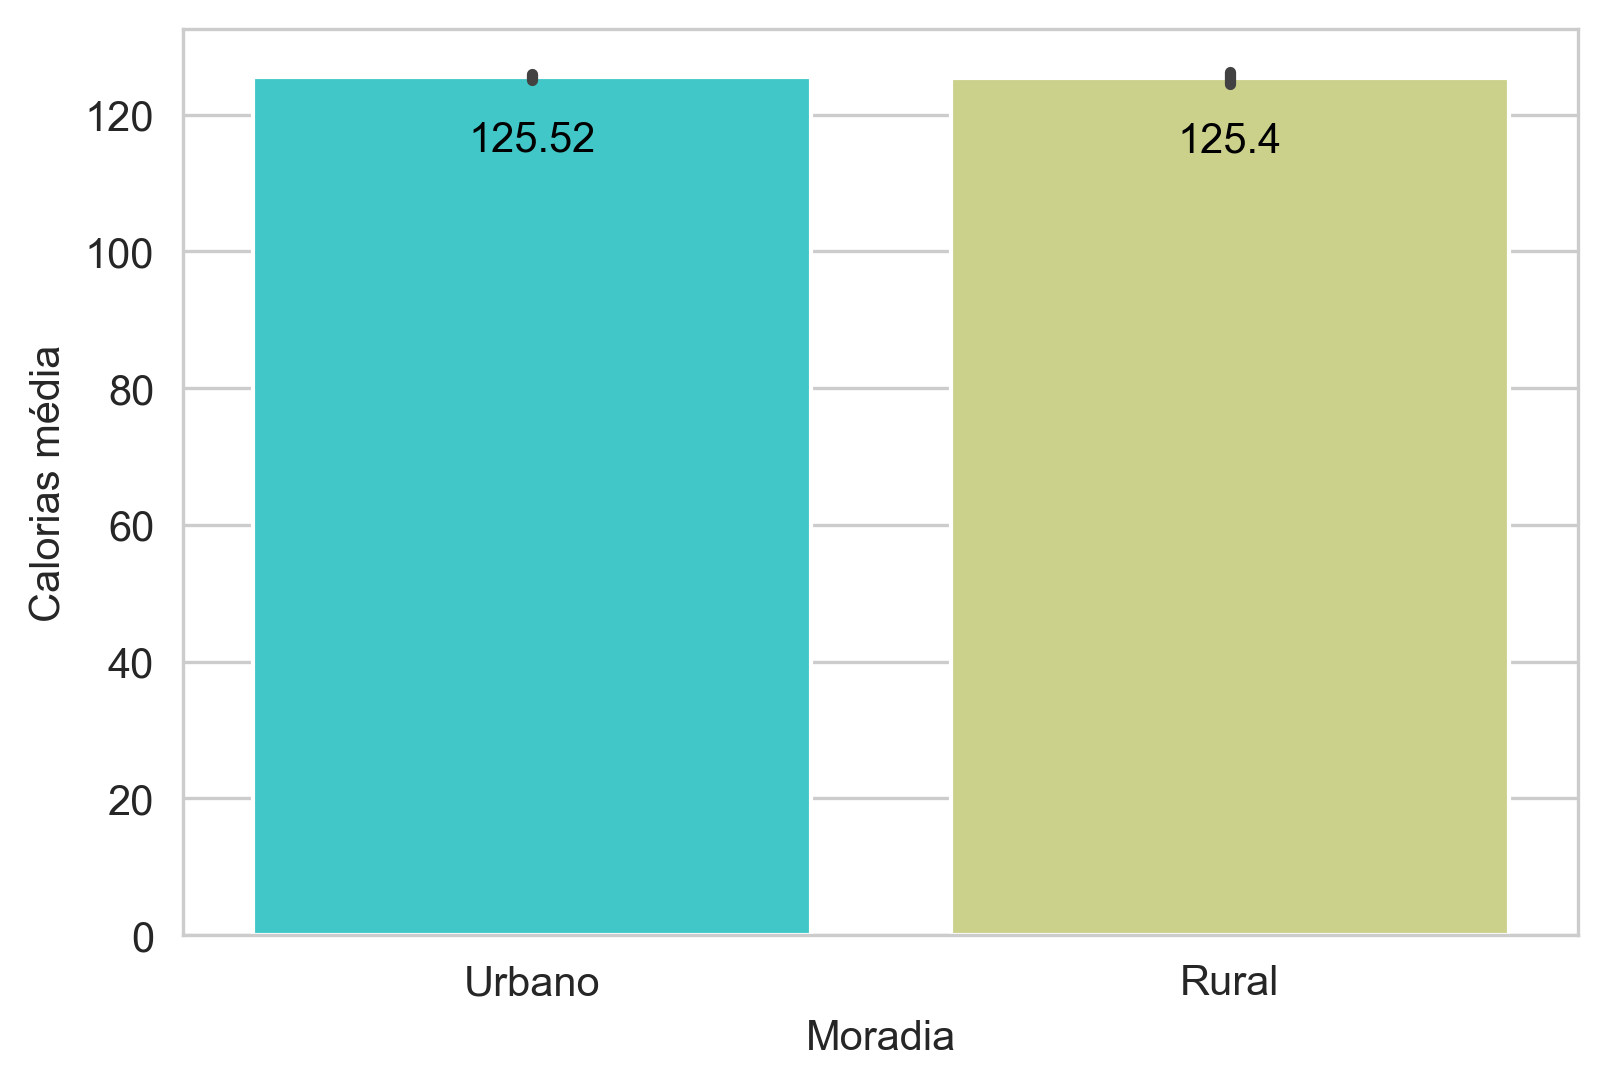

In [41]:
ax = sns.barplot(x='TIPO_SITUACAO_REG', y='ENERGIA_KCAL', data=dfConsumo, palette='rainbow')
ax.set_xlabel('Moradia')
ax.set_xticklabels(['Urbano', 'Rural'])
ax.set_ylabel('Calorias média')
for p in ax.patches:
    ax.annotate(f'\n{round(p.get_height(), 2)}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=10)

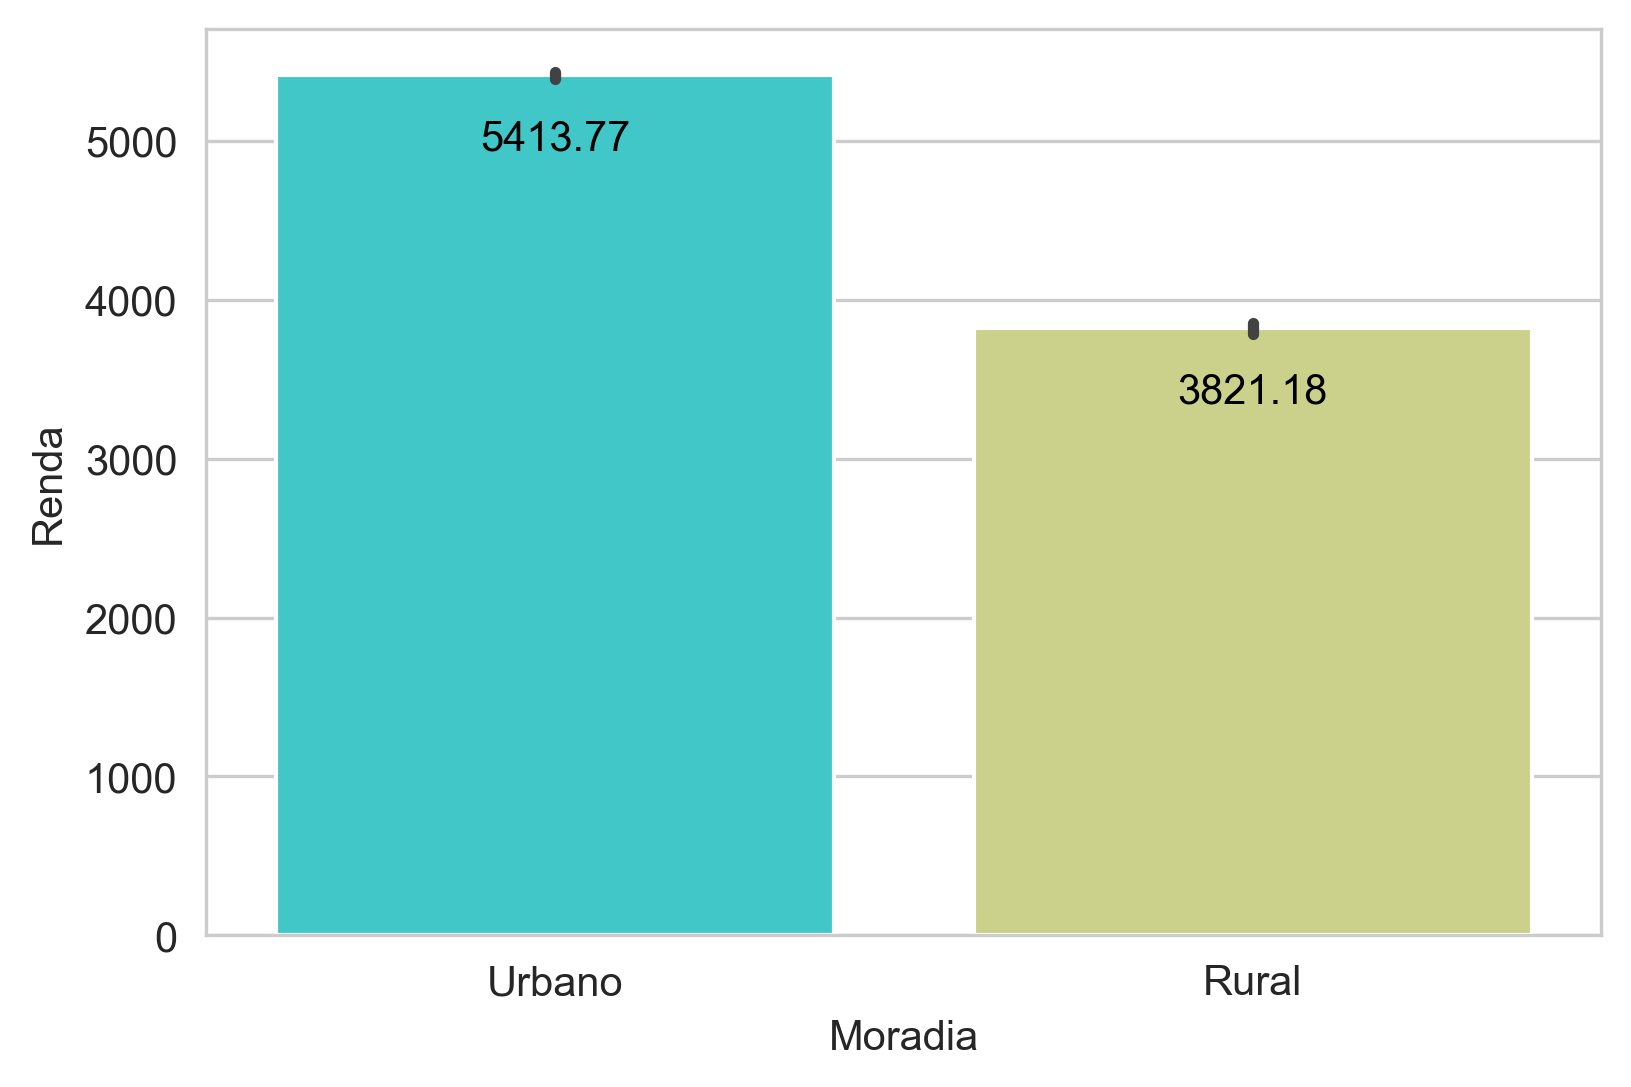

In [42]:
ax = sns.barplot(x='TIPO_SITUACAO_REG', y='RENDA_TOTAL', data=dfConsumo, palette='rainbow')
ax.set_xlabel('Moradia')
ax.set_xticklabels(['Urbano', 'Rural'])
ax.set_ylabel('Renda')
for p in ax.patches:
    ax.annotate(f'\n{round(p.get_height(), 2)}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=10)

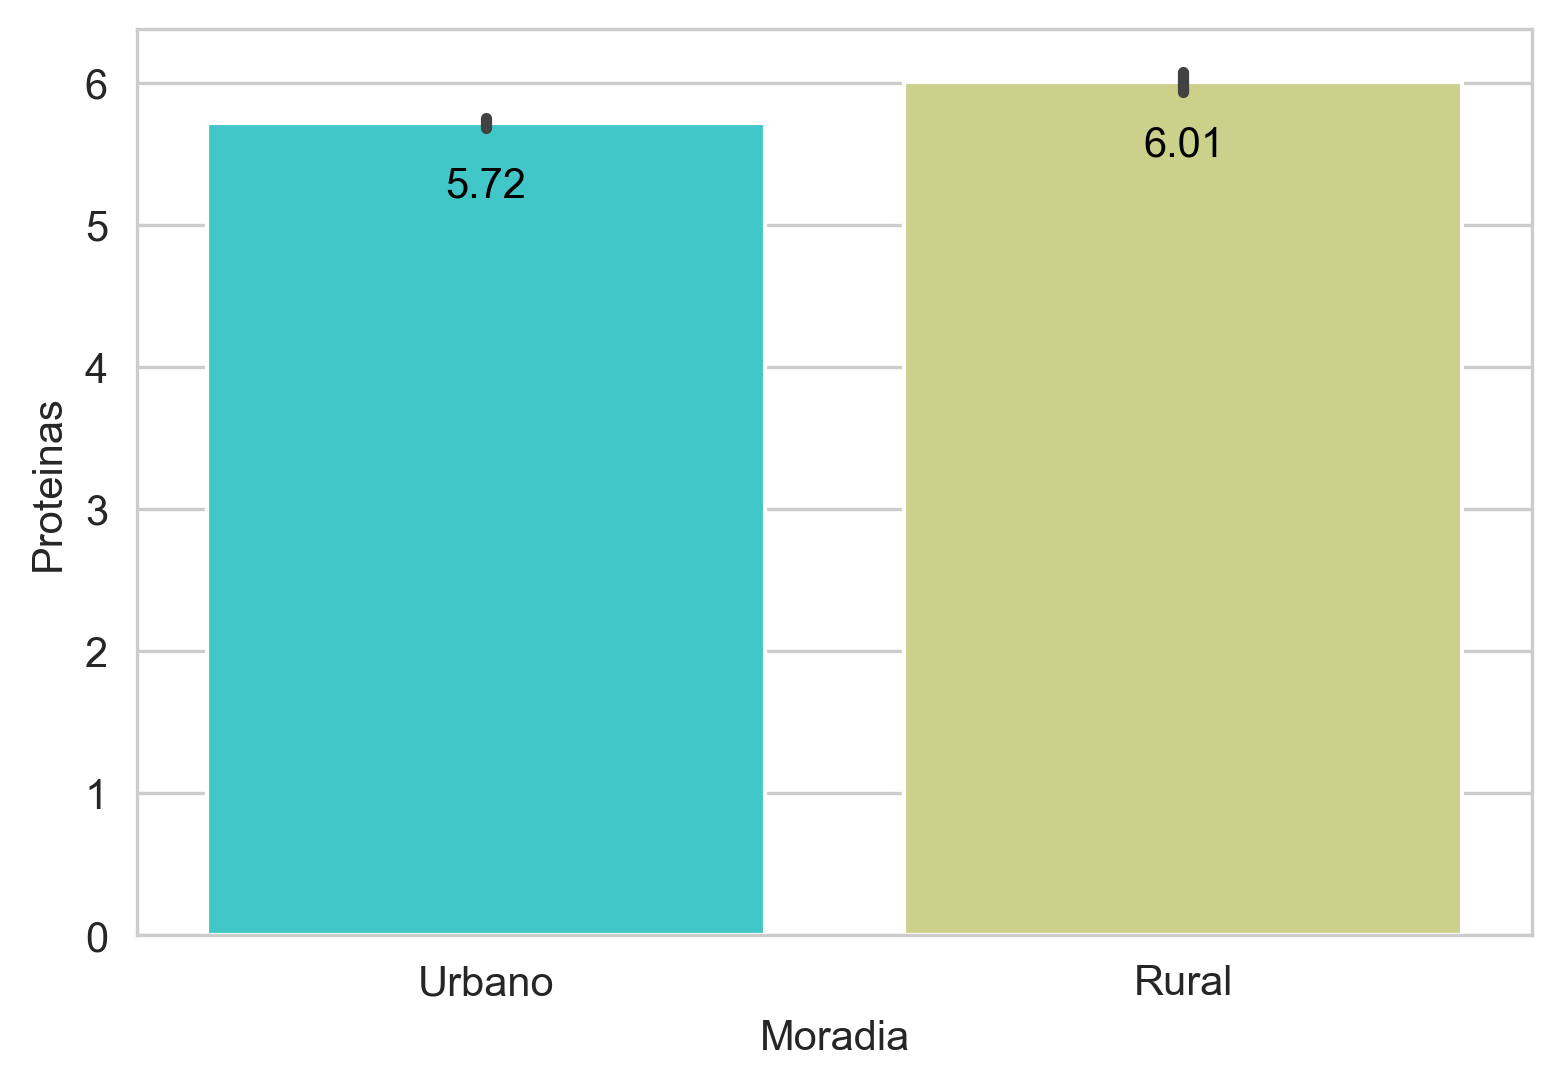

In [43]:
ax = sns.barplot(x='TIPO_SITUACAO_REG', y='PTN', data=dfConsumo, palette='rainbow')
ax.set_xlabel('Moradia')
ax.set_xticklabels(['Urbano', 'Rural'])
ax.set_ylabel('Proteinas')
for p in ax.patches:
    ax.annotate(f'\n{round(p.get_height(), 2)}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=10)

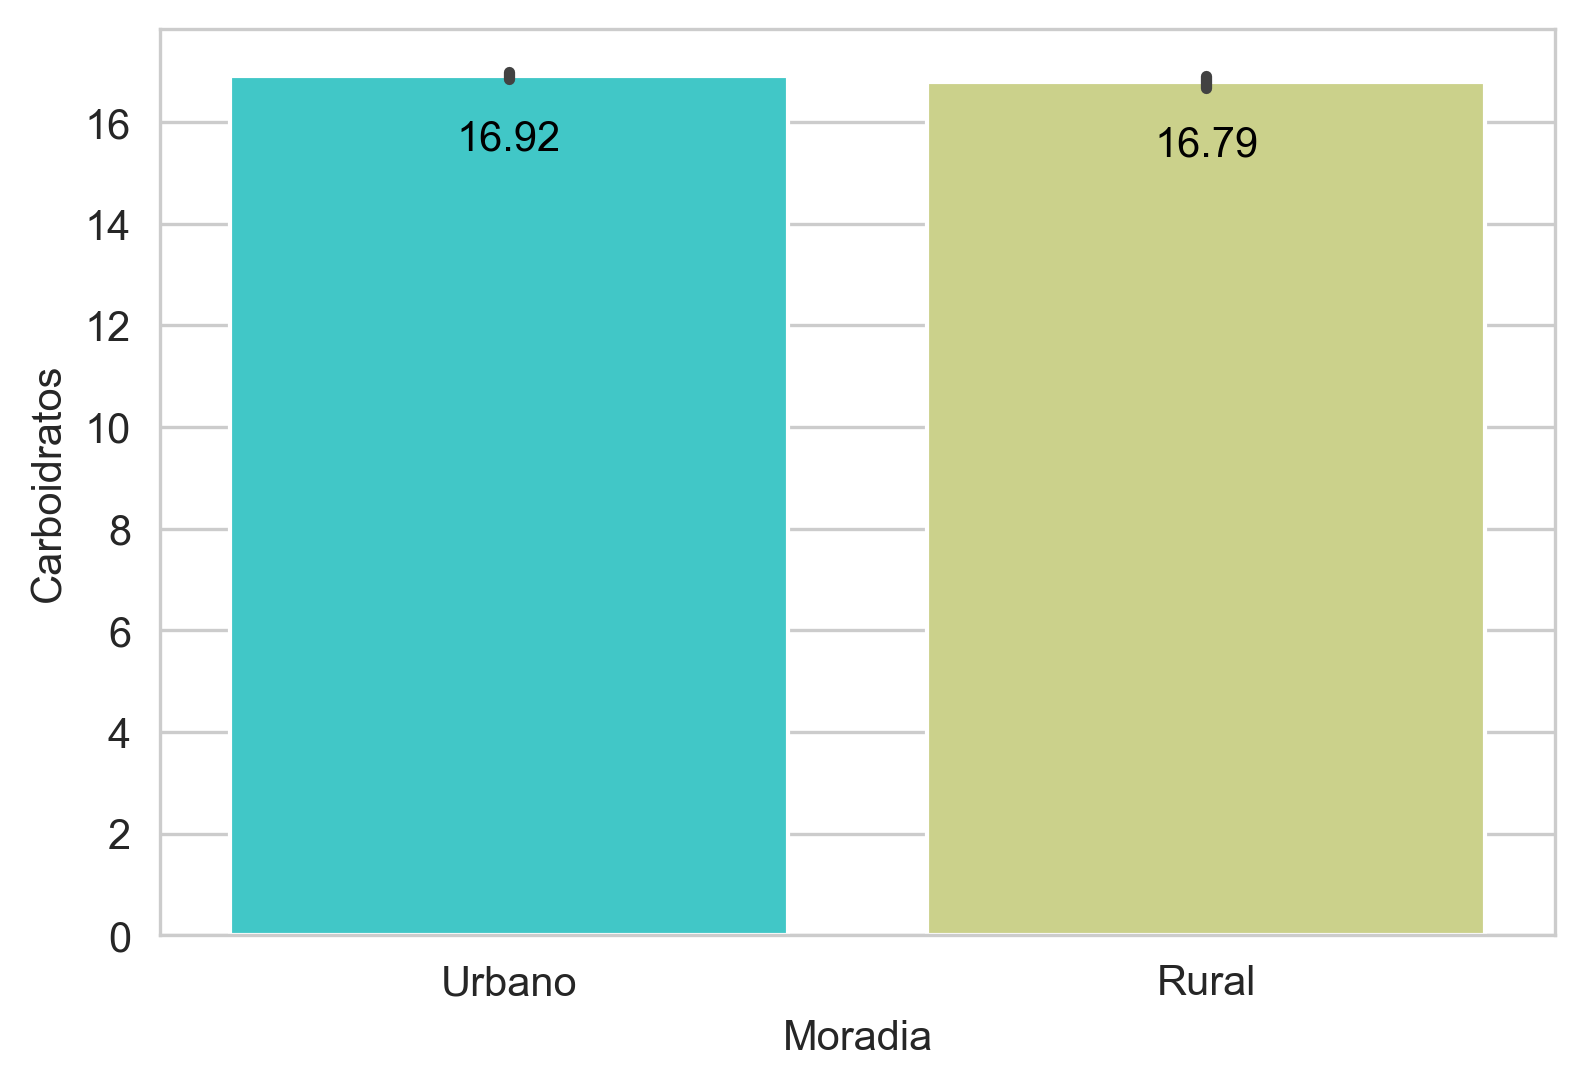

In [44]:
ax = sns.barplot(x='TIPO_SITUACAO_REG', y='CHOTOT', data=dfConsumo, palette='rainbow')
ax.set_xlabel('Moradia')
ax.set_xticklabels(['Urbano', 'Rural'])
ax.set_ylabel('Carboidratos')
for p in ax.patches:
    ax.annotate(f'\n{round(p.get_height(), 2)}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=10)
    

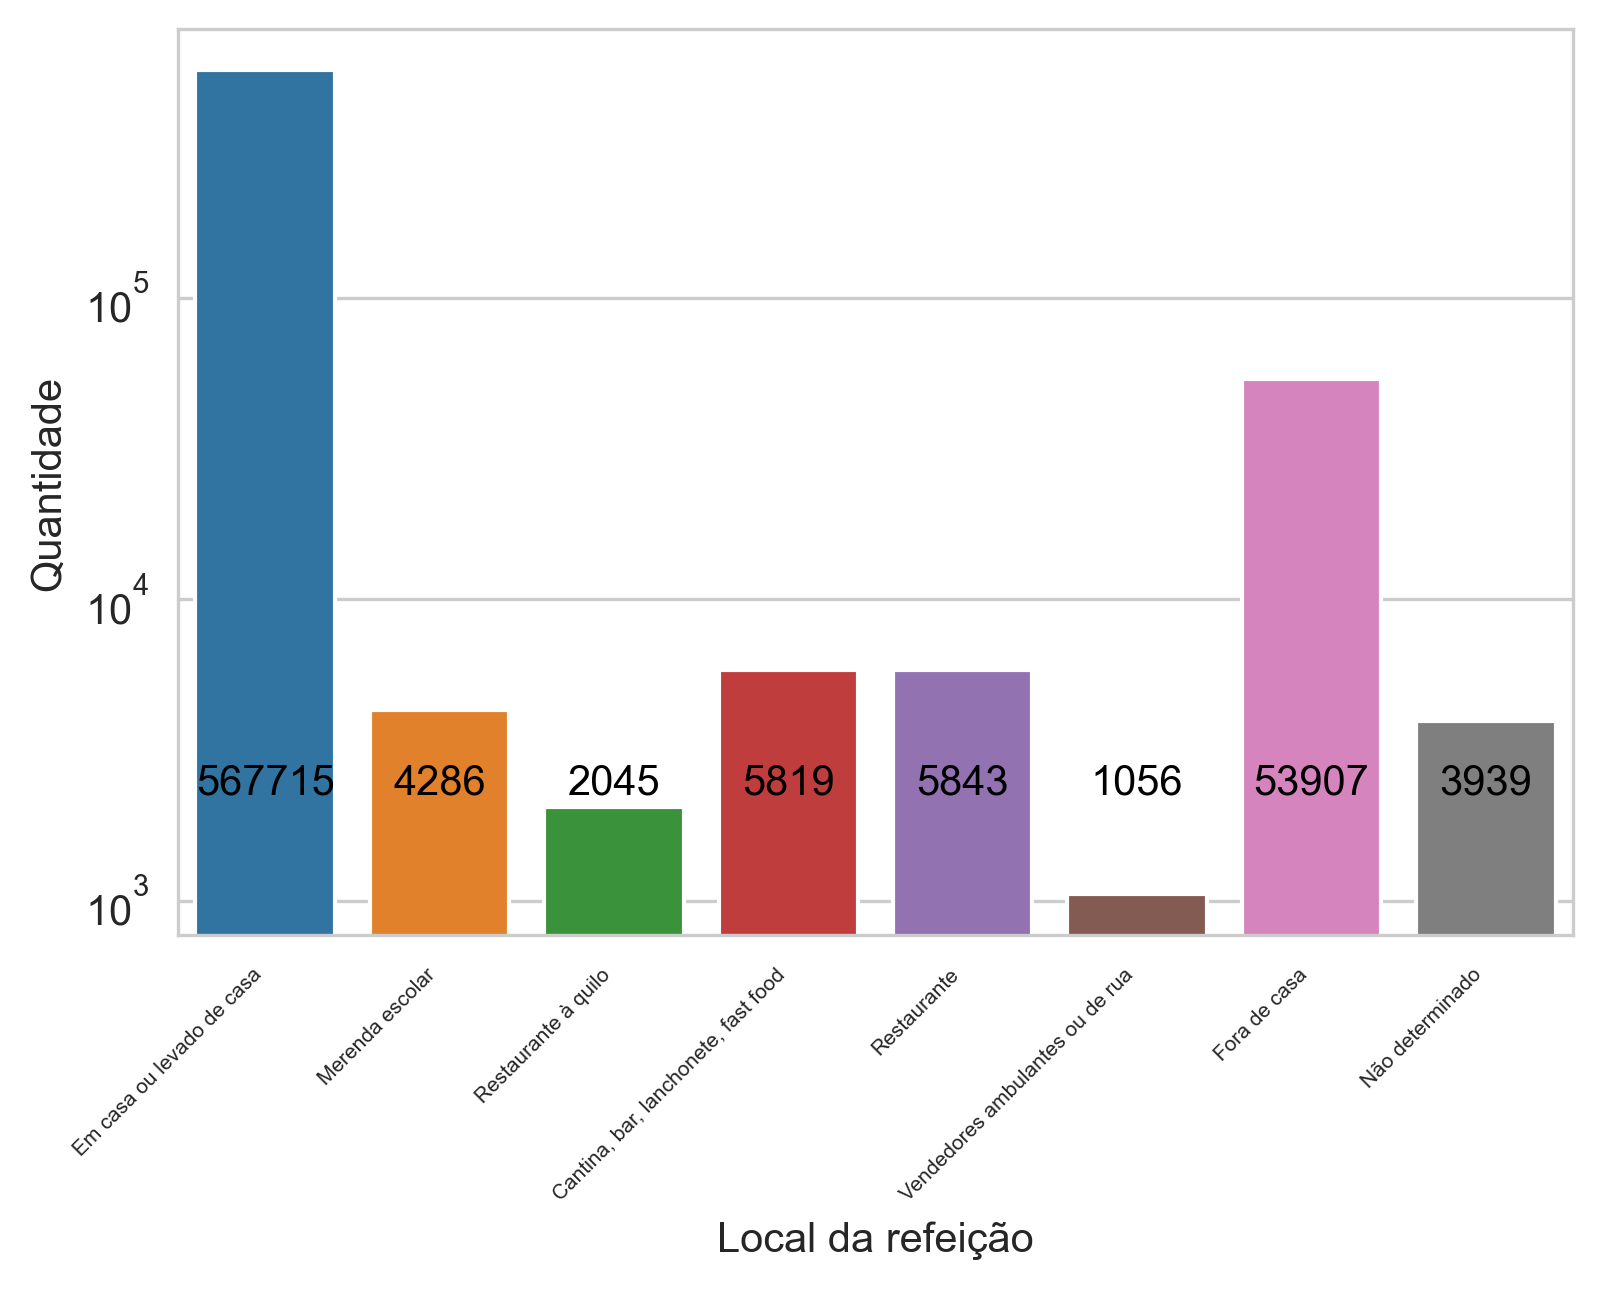

In [45]:
''' Local da refeição
1 – Em casa ou levado de casa
2 – Merenda escolar
3 – Restaurante à quilo
4 – Cantina, bar, lanchonete, fast food
5 – Restaurante – outros
6 – Vendedores ambulantes ou de rua
7 – Fora de casa – outros
9 – Não determinado 
''' 
ax = sns.countplot(data=dfConsumo, x=dfConsumo['V9018'], )
ax.set_yscale('log')
#ax.set_title('Local da refeição', fontsize=20)
ax.set_xlabel("Local da refeição")
ax.set_ylabel("Quantidade")
ax.set_xticklabels(['Em casa ou levado de casa', 
                    'Merenda escolar', 
                    'Restaurante à quilo', 
                    'Cantina, bar, lanchonete, fast food', 
                    'Restaurante', 
                    'Vendedores ambulantes ou de rua', 
                    'Fora de casa', 
                    'Não determinado'], 
                   rotation=45, ha="right", size=5)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, 4000), ha='center', va='top', color='black', size=10)

## Combinação do dataset Consumo com o Dieta. 

In [46]:
dfDieta["PESSOA"] = dfDieta.apply(lambda row: criarPessoa(row), axis=1)

In [47]:
pessoas = dict()

for index, row in dfConsumo.iterrows():
    pessoa = row['PESSOA']
    
    if(pessoas.get(pessoa) == None):
        pessoas[pessoa] = [0,0,0,0,set(),0] # calorias, proteinas, lipidios, quantidade, refeições
    
    pessoas[pessoa][0] += row['CHOTOT']
    pessoas[pessoa][1] += row['PTN']
    pessoas[pessoa][2] += row['LIP']
    pessoas[pessoa][3] += row['MAGNESIO']    
    pessoas[pessoa][4].add(row['QUADRO'])
    pessoas[pessoa][5] += 1

In [48]:
dfDieta['MEDIA_CAL'] = dfDieta.apply( lambda row: pessoas[row['PESSOA']][0]/len(pessoas[row['PESSOA']][4]), axis=1)
dfDieta['MEDIA_PTN'] = dfDieta.apply( lambda row: pessoas[row['PESSOA']][1]/len(pessoas[row['PESSOA']][4]), axis=1)
dfDieta['MEDIA_LIP'] = dfDieta.apply( lambda row: pessoas[row['PESSOA']][2]/len(pessoas[row['PESSOA']][4]), axis=1)
dfDieta['MEDIA_MAG'] = dfDieta.apply( lambda row: pessoas[row['PESSOA']][3]/len(pessoas[row['PESSOA']][4]), axis=1)
dfDieta['MEDIA_REF'] = dfDieta.apply( lambda row: pessoas[row['PESSOA']][5]/len(pessoas[row['PESSOA']][4]), axis=1)

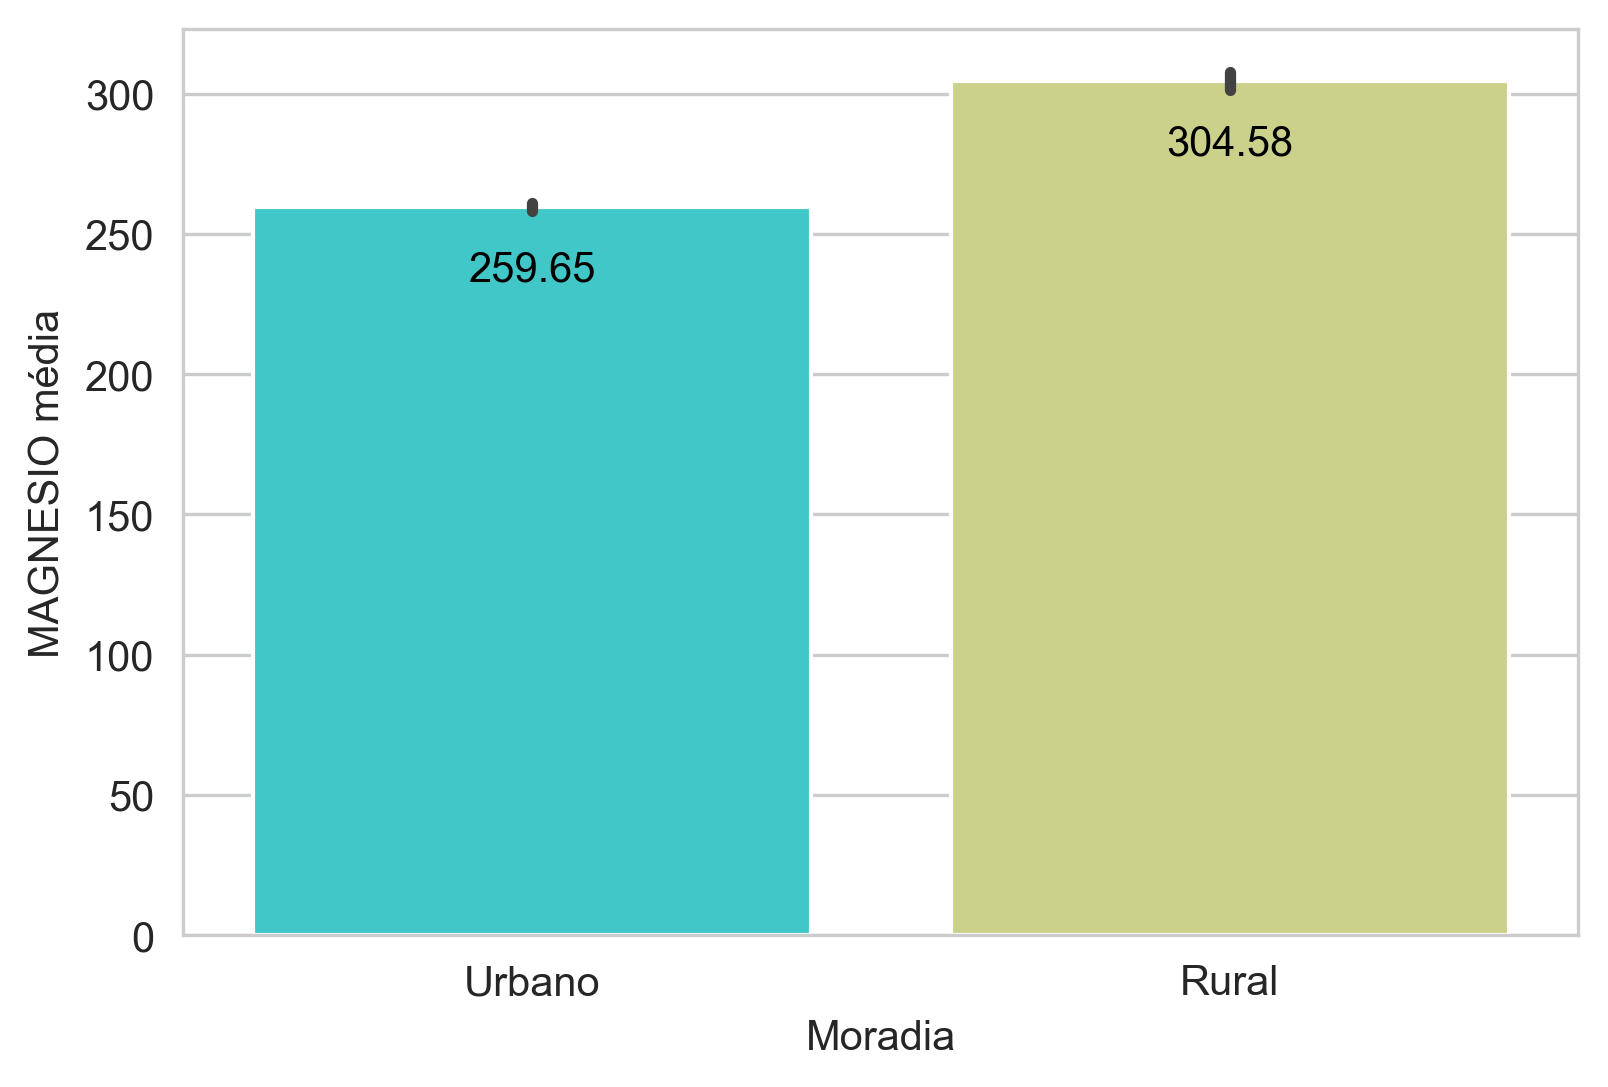

In [49]:
ax = sns.barplot(x='TIPO_SITUACAO_REG', y='MEDIA_MAG', data=dfDieta, palette='rainbow')
ax.set_xlabel('Moradia')
ax.set_xticklabels(['Urbano', 'Rural'])
ax.set_ylabel('MAGNESIO média')
for p in ax.patches:
    ax.annotate(f'\n{round(p.get_height(), 2)}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=10)

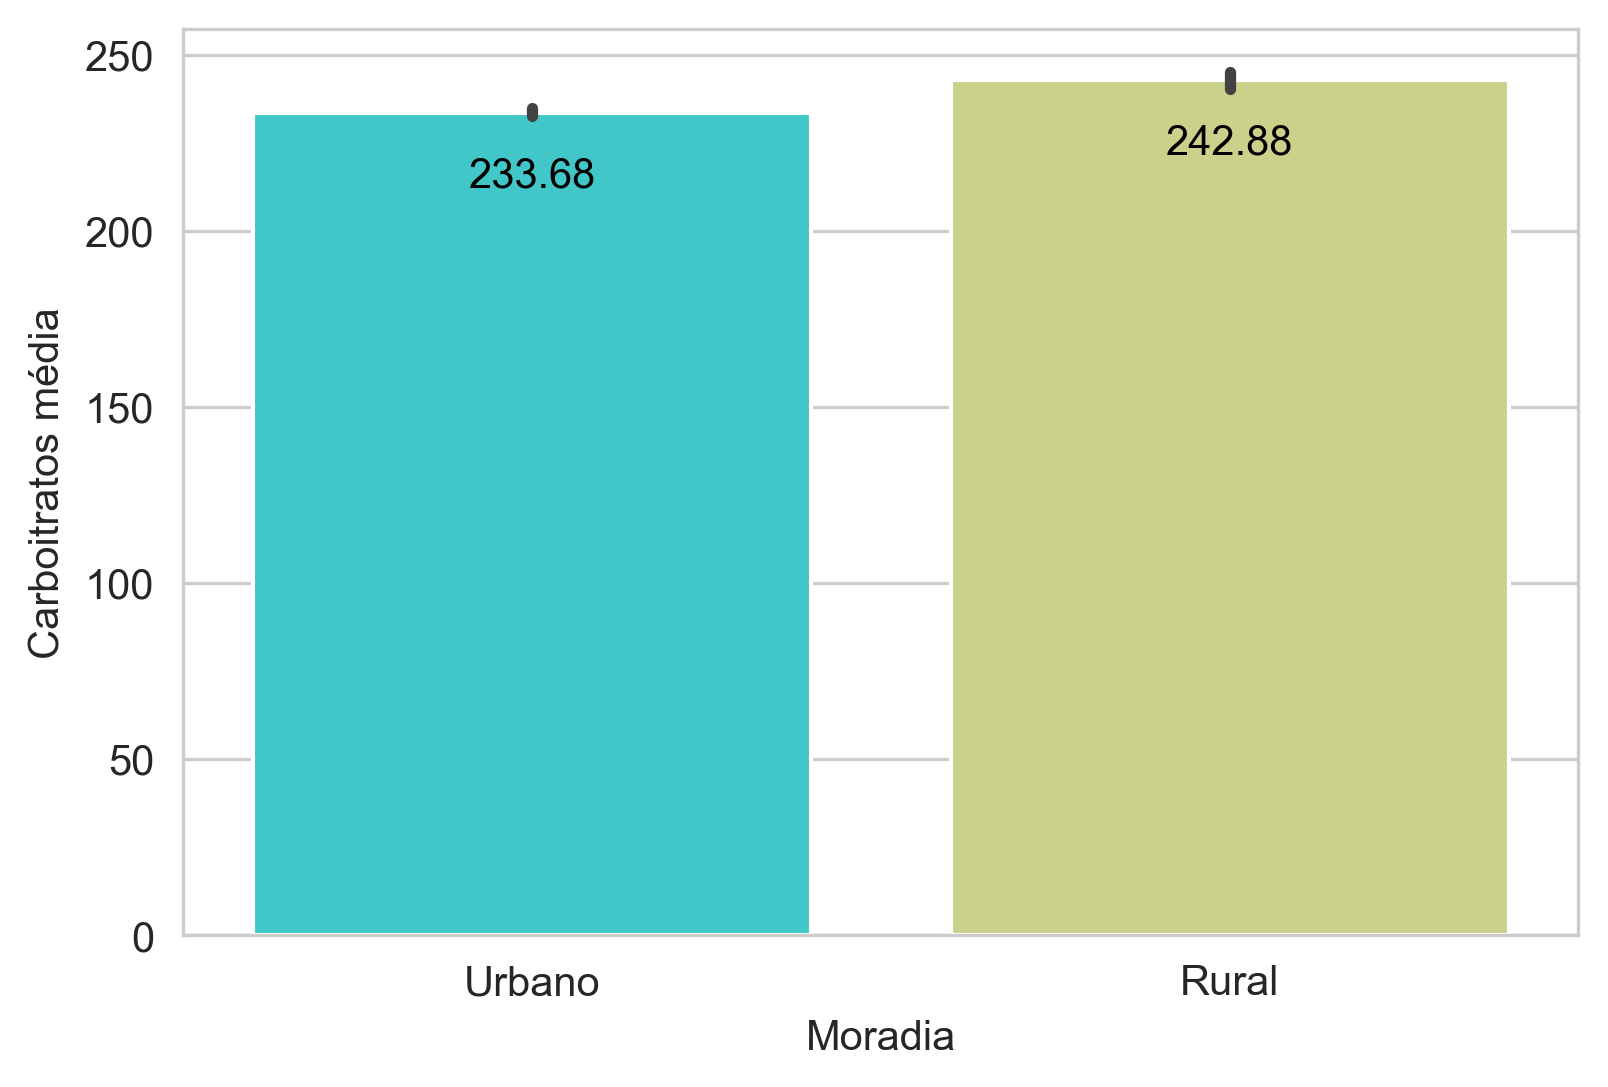

In [50]:
ax = sns.barplot(x='TIPO_SITUACAO_REG', y='MEDIA_CAL', data=dfDieta, palette='rainbow')
ax.set_xlabel('Moradia')
ax.set_xticklabels(['Urbano', 'Rural'])
ax.set_ylabel('Carboitratos média')
for p in ax.patches:
    ax.annotate(f'\n{round(p.get_height(), 2)}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=10)

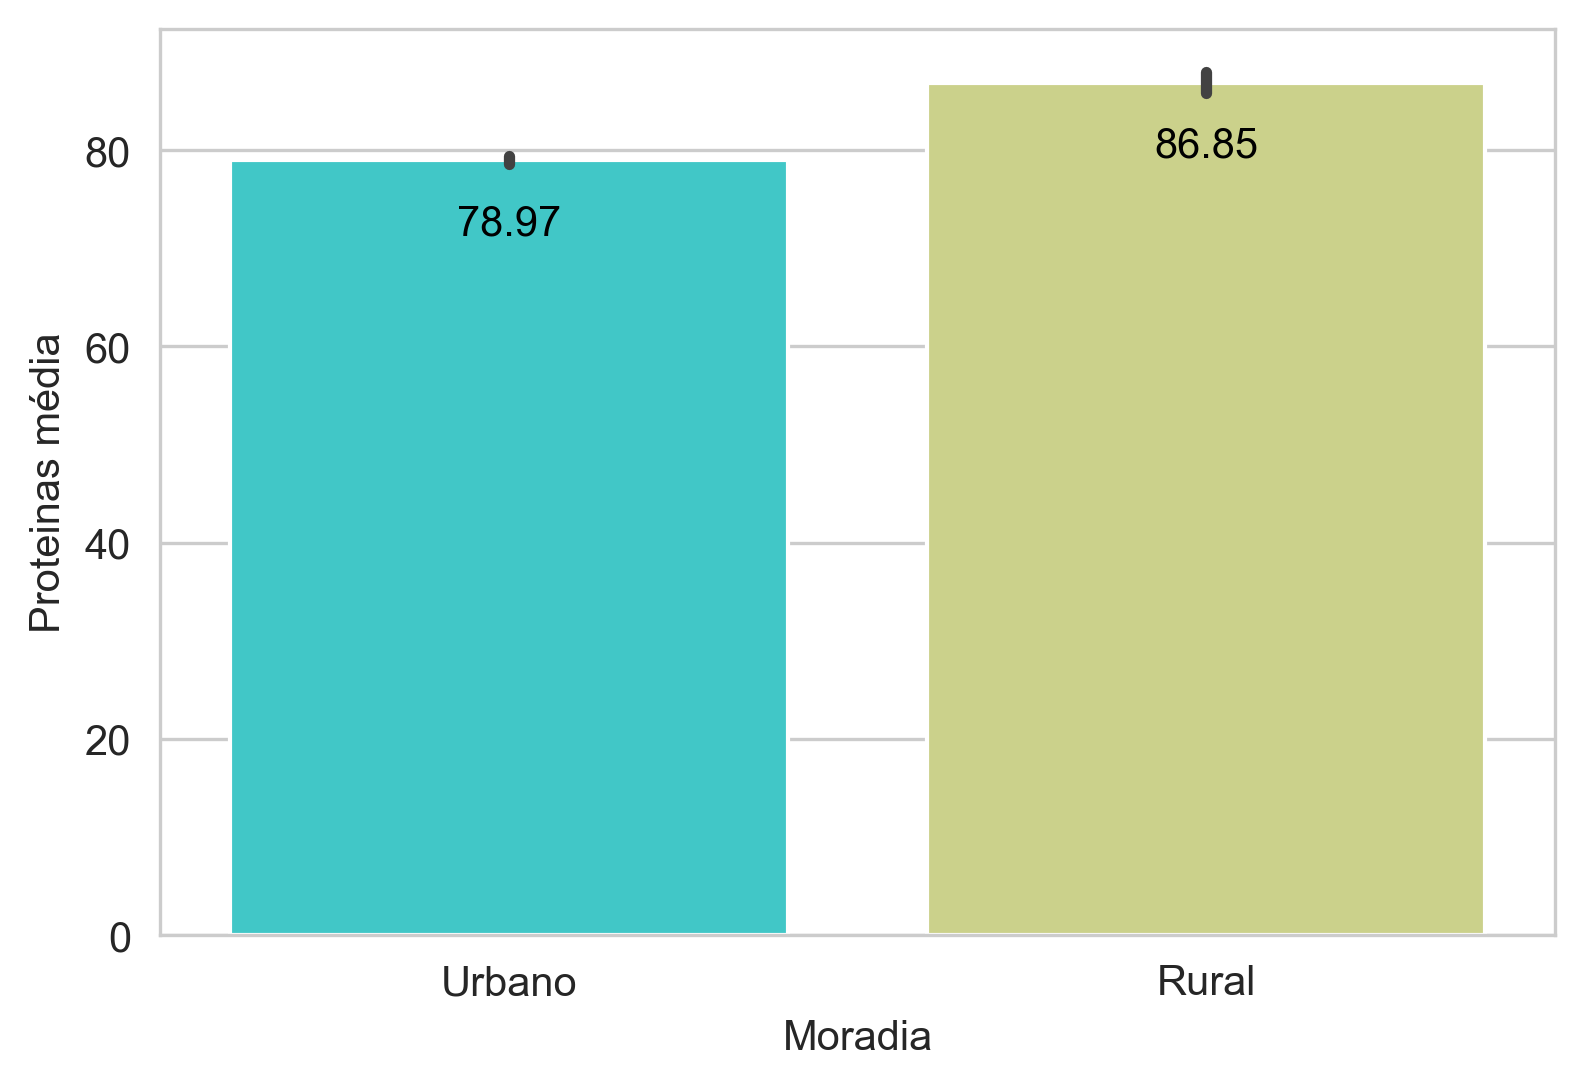

In [51]:
ax = sns.barplot(x='TIPO_SITUACAO_REG', y='MEDIA_PTN', data=dfDieta, palette='rainbow')
ax.set_xlabel('Moradia')
ax.set_xticklabels(['Urbano', 'Rural'])
ax.set_ylabel('Proteinas média')
for p in ax.patches:
    ax.annotate(f'\n{round(p.get_height(), 2)}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=10)

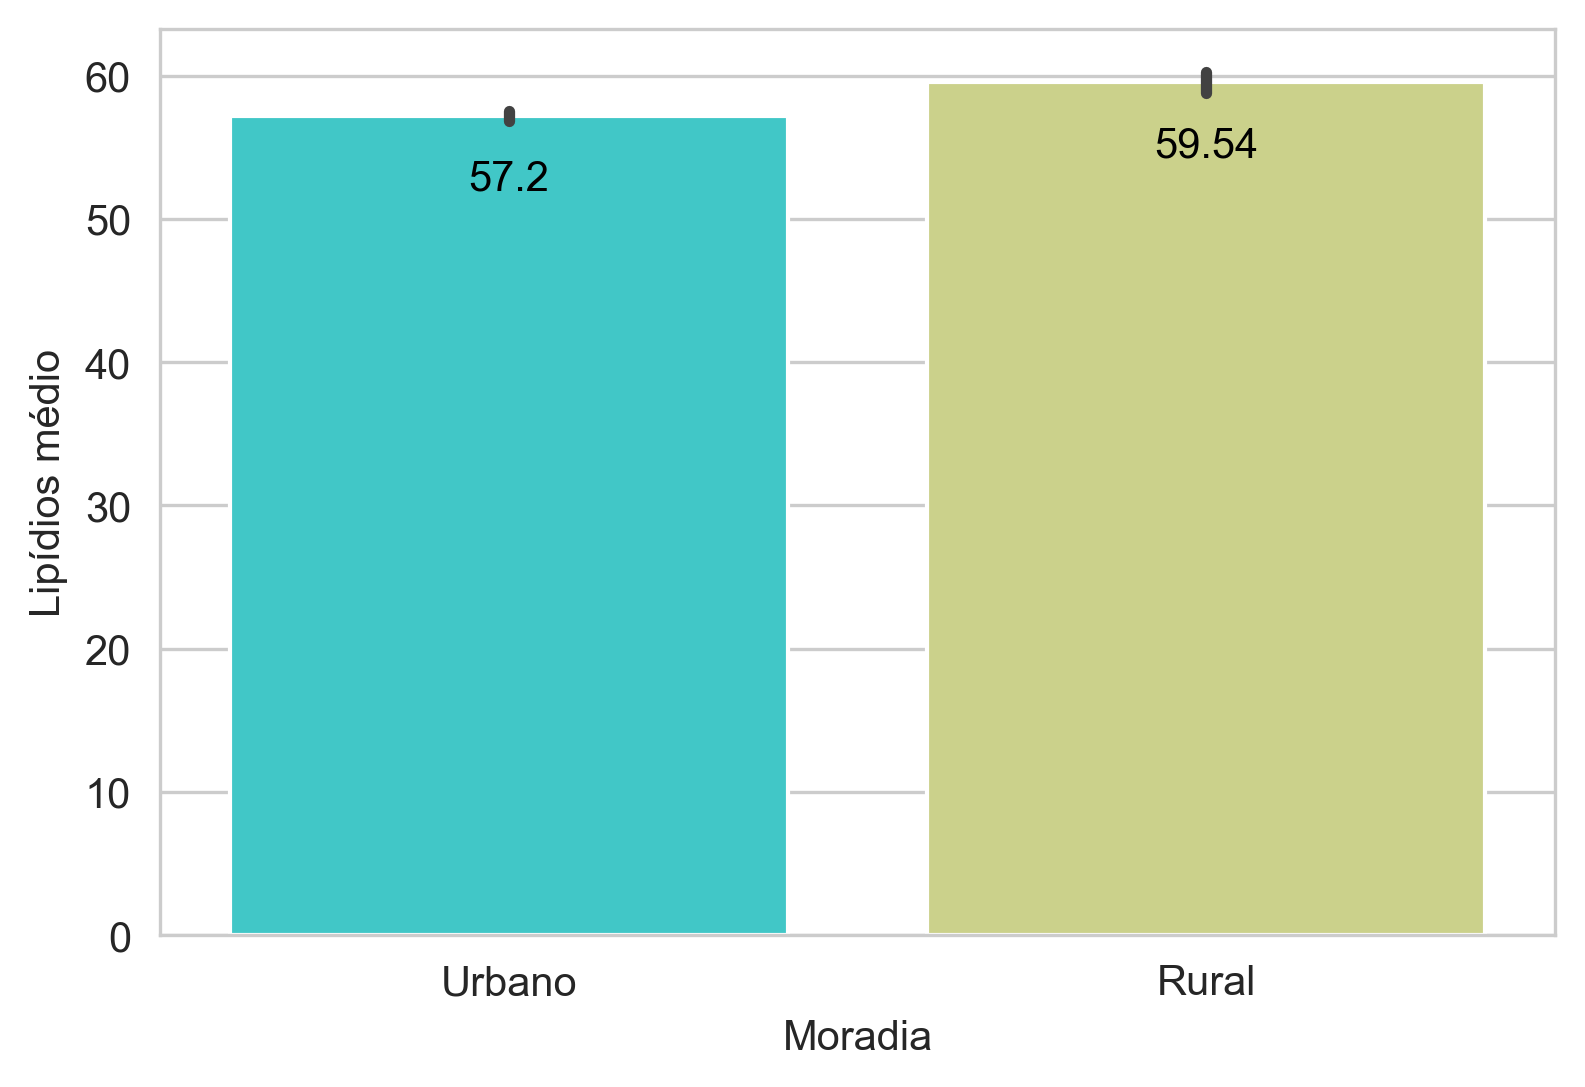

In [52]:
ax = sns.barplot(x='TIPO_SITUACAO_REG', y='MEDIA_LIP', data=dfDieta, palette='rainbow')
ax.set_xlabel('Moradia')
ax.set_xticklabels(['Urbano', 'Rural'])
ax.set_ylabel('Lipídios médio')
for p in ax.patches:
    ax.annotate(f'\n{round(p.get_height(), 2)}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=10)

In [53]:
dfDieta['DIAS'] = dfDieta.apply(lambda row: len(pessoas[row['PESSOA']][4]), axis=1)

In [54]:
dfDieta['DIAS']

0        1
1        1
2        1
3        1
4        1
        ..
46159    1
46160    1
46161    1
46162    1
46163    1
Name: DIAS, Length: 46164, dtype: int64

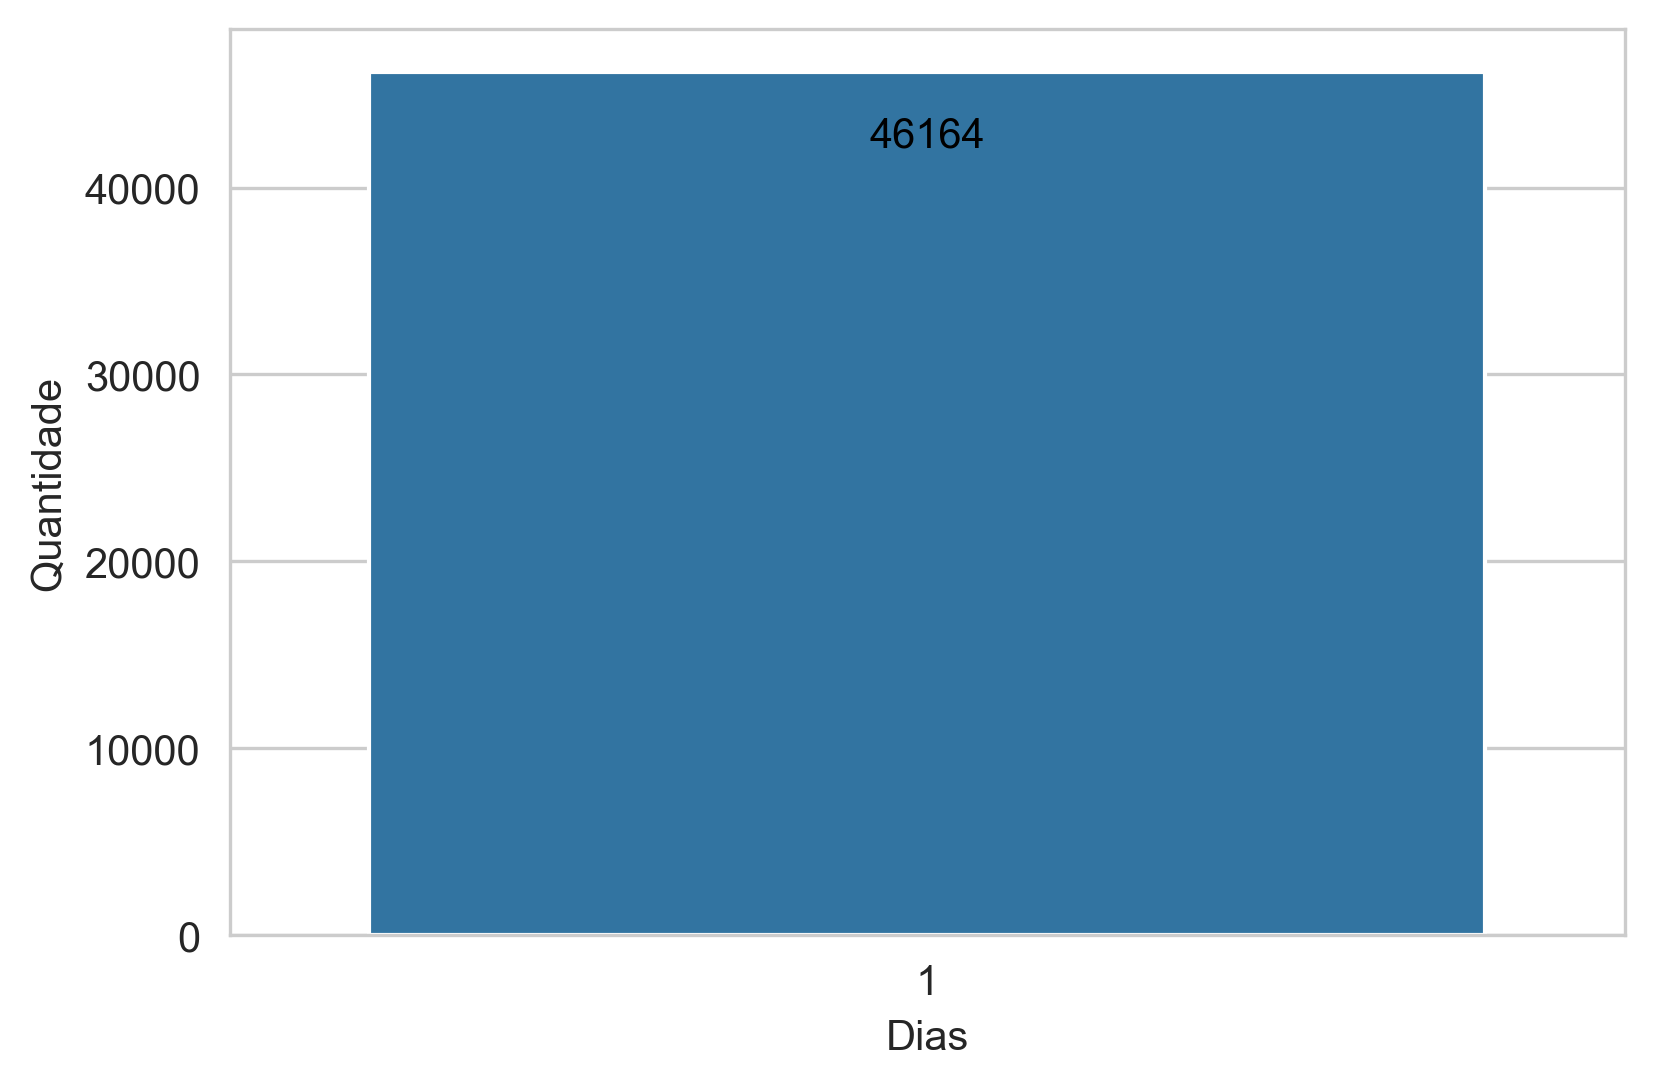

In [55]:
ax = sns.countplot(data=dfDieta, x='DIAS')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Dias')
for p in ax.patches:
    ax.annotate(f'\n{round(p.get_height(), 2)}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=10)

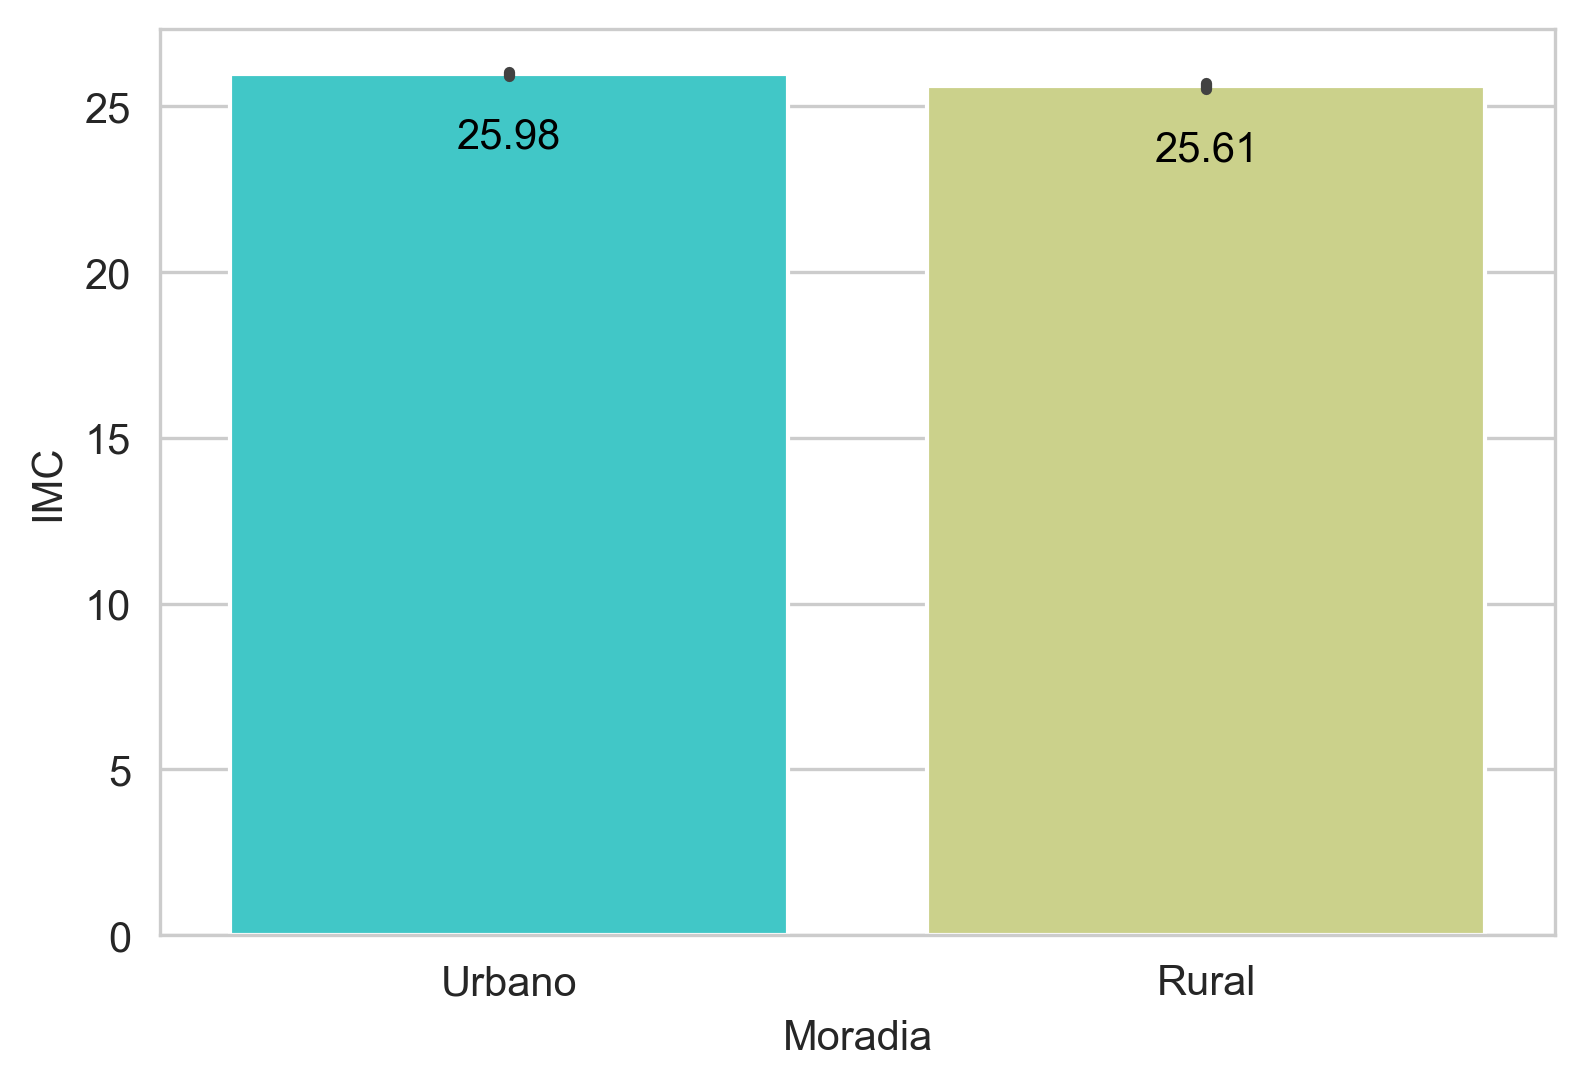

In [56]:
ax = sns.barplot(x='TIPO_SITUACAO_REG', y='imc', data=dfDieta, palette='rainbow')
ax.set_xlabel('Moradia')
ax.set_xticklabels(['Urbano', 'Rural'])
ax.set_ylabel('IMC')
for p in ax.patches:
    ax.annotate(f'\n{round(p.get_height(), 2)}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=10)

In [79]:
dfConsumo.keys()

Index(['UF', 'ESTRATO_POF', 'TIPO_SITUACAO_REG', 'COD_UPA', 'NUM_DOM',
       'NUM_UC', 'COD_INFORMANTE', 'QUADRO', 'SEQ', 'V9005', 'V9007', 'V9001',
       'V9015', 'V9016', 'V9017', 'V9018', 'V9019', 'V9020', 'V9021', 'V9022',
       'V9023', 'V9024', 'V9025', 'V9026', 'V9027', 'V9028', 'V9029', 'V9030',
       'COD_UNIDADE_MEDIDA_FINAL', 'COD_PREPARACAO_FINAL', 'GRAMATURA1', 'QTD',
       'COD_TBCA', 'ENERGIA_KCAL', 'ENERGIA_KJ', 'PTN', 'CHOTOT', 'FIBRA',
       'LIP', 'COLEST', 'AGSAT', 'AGMONO', 'AGPOLI', 'AGTRANS', 'CALCIO',
       'FERRO', 'SODIO', 'MAGNESIO', 'FOSFORO', 'POTASSIO', 'COBRE', 'ZINCO',
       'VITA_RAE', 'TIAMINA', 'RIBOFLAVINA', 'NIACINA', 'PIRIDOXAMINA',
       'COBALAMINA', 'VITD', 'VITE', 'VITC', 'FOLATO', 'PESO', 'PESO_FINAL',
       'RENDA_TOTAL', 'DIA_SEMANA', 'DIA_ATIPICO', 'id', 'iddomic', 'PESSOA'],
      dtype='object')

In [84]:
dfConsumo[['PESSOA', 'RENDA_TOTAL', 'PESO', 'PESO_FINAL']].head(40)

,PESSOA,RENDA_TOTAL,PESO,PESO_FINAL
0,110000016.0#1.0#2.0#1.0,3855.34,1316.609446,2390.486523
1,110000016.0#1.0#2.0#1.0,3855.34,1316.609446,2390.486523
2,110000016.0#1.0#2.0#1.0,3855.34,1316.609446,2390.486523
3,110000016.0#1.0#2.0#1.0,3855.34,1316.609446,2390.486523
4,110000016.0#1.0#2.0#1.0,3855.34,1316.609446,2390.486523
5,110000016.0#1.0#2.0#1.0,3855.34,1316.609446,2390.486523
6,110000016.0#1.0#2.0#1.0,3855.34,1316.609446,2390.486523
7,110000016.0#1.0#2.0#1.0,3855.34,1316.609446,2390.486523
8,110000016.0#1.0#2.0#1.0,3855.34,1316.609446,2390.486523
9,110000016.0#1.0#2.0#1.0,3855.34,1316.609446,2390.486523


In [74]:
dfConsumo.UF.unique()

array([11., 12., 13., 14., 15., 16., 17., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 31., 32., 33., 35., 41., 42., 43., 50., 51., 52.,
       53.])

## Outhers dataframe

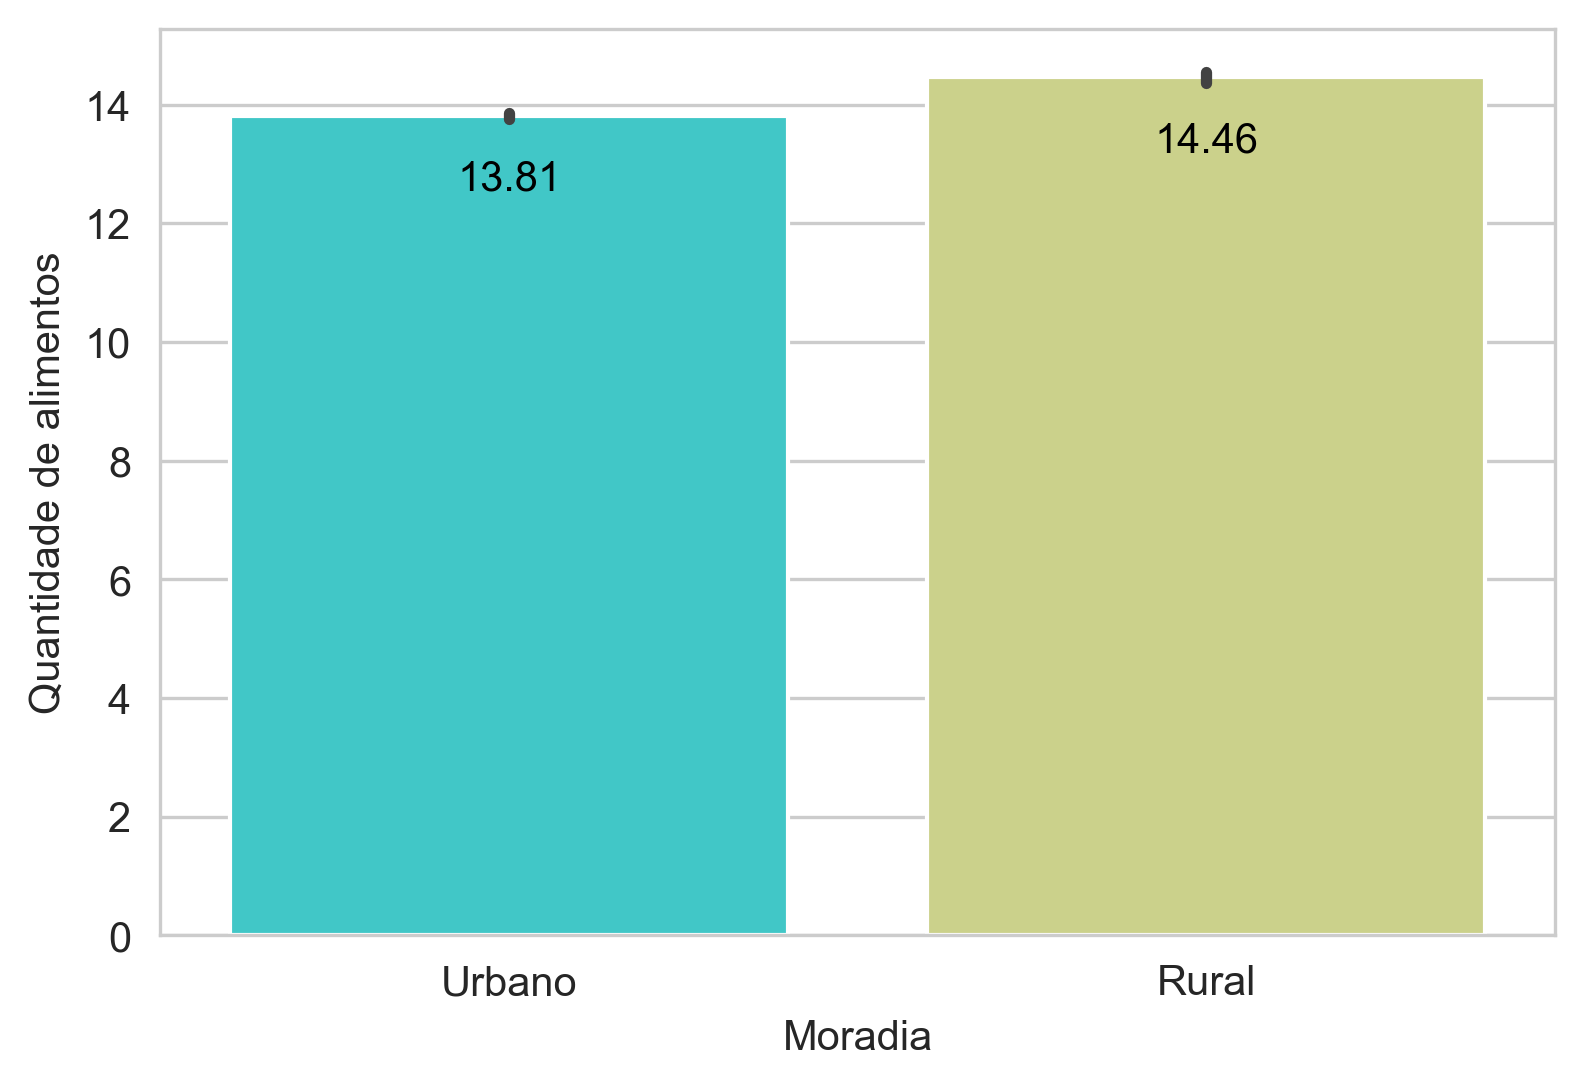

In [59]:
ax = sns.barplot(x='TIPO_SITUACAO_REG', y='MEDIA_REF', data=dfDieta, palette='rainbow')
ax.set_xlabel('Moradia')
ax.set_xticklabels(['Urbano', 'Rural'])
ax.set_ylabel('Quantidade de alimentos')
for p in ax.patches:
    ax.annotate(f'\n{round(p.get_height(), 2)}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=10)

In [60]:
dfCorr = dfDomicilio.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
fig = px.imshow(
    filteredDf,
    width=1000, 
    height=1000
)
fig.show()

In [61]:
dfCorr = dfConsumo.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
fig = px.imshow(
    filteredDf,
    width=1000, 
    height=1000
)
fig.show()

In [62]:
dfCorr = dfDieta.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
fig = px.imshow(
    filteredDf,
    width=1000, 
    height=1000
)
fig.show()

In [63]:
dfConsumo.isna().sum().sum()

2117906

In [64]:
dfDieta.isna().sum().sum()

1175475

In [65]:
dfDomicilio.isna().sum()

UF                       0
ESTRATO_POF              0
TIPO_SITUACAO_REG        0
COD_UPA                  0
NUM_DOM                  0
V0201                    0
V0202                    0
V0203                    0
V0204                    0
V0205                    0
V0206                    0
V0207                    0
V0208                13733
V0209                    0
V02101                3066
V02102                3066
V02103                3066
V02104                3066
V02105                3066
V02111                   0
V02112               55657
V02113               56010
V0212                  664
V0213                    0
V02141                   0
V02142                   0
V0215                  587
V02161                   0
V02162                   0
V02163                   0
V02164                   0
V0217                    0
V0219                48935
V0220                    0
V0221                    0
PESO                     0
PESO_FINAL               0
V